question 1

In [3]:
# load in basic libraries
from autograd import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')
datapath = './'

In [4]:
# import the dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:] 

# log-transform data
x = np.log(x)
y = np.log(y)

In [5]:
x

array([[7.22256602, 7.13089883, 2.00148   , ..., 0.6805684 , 1.41585316,
        1.47704872]])

In [6]:
y

array([[12.7512997 , 12.9408415 ,  8.03915739, ...,  7.27232895,
         7.78155596,  7.77821147]])

In [7]:
# compute linear combination of input point
def model(x,w):
  #complete the function
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [8]:
np.random.seed(5819)
w = 0.1*np.random.randn(2,1)
w

array([[0.11146689],
       [0.09940251]])

In [9]:
z = model(x,w)
z

array([[0.8294081 , 0.82029615, 0.31041903, ..., 0.1791171 , 0.25220625,
        0.25828925]])

In [10]:
z.shape

(1, 1498)

In [13]:
# an implementation of the least squares cost function for linear regression
def least_squares(w):
  # finish the implementation
    cost = np.sum((model(x,w) - y)**2)
    return cost/float(np.size(y))

In [14]:
# import automatic differentiator to compute gradient module
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        # finish the next line of code
        grad_eval = gradient(w)

        # take gradient descent step
        # finish the next line of code
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [15]:
np.random.seed(5819)
g = least_squares; w = 0.1*np.random.randn(2,1); max_its = 1000; alpha_choice = 10**(-2);
weight_history, cost_history = gradient_descent(g,alpha_choice,max_its,w)

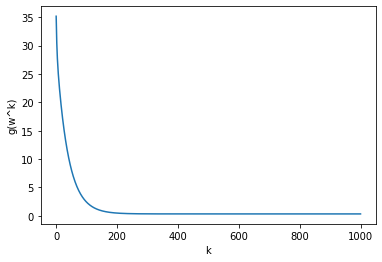

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");

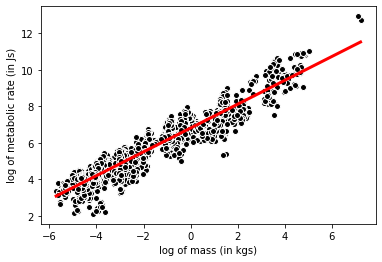

In [17]:
# plot data with linear fit 
s = np.linspace(np.min(x),np.max(x))
w = weight_history[-1]
t = w[0] + w[1]*s

figure = plt.figure()
plt.plot(s,t,linewidth = 3,color = 'r')
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('log of mass (in kgs)')
plt.ylabel('log of metabolic rate (in Js)')
plt.show()

question 2


In [18]:
# using an automatic differentiator - like the one imported via the statement below - makes coding up gradient descent a breeze
from autograd import grad 
from autograd import hessian

# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(g,max_its,w,**kwargs):
    # compute gradient module using autograd
    # finish the next line of code
    gradient = grad(g)
    hess = hessian(g)
    
    # set numericxal stability parameter / regularization parameter
    epsilon = 10**(-10)
    if 'epsilon' in kwargs:
        epsilon = kwargs['epsilon']

    # run the newtons method loop
    weight_history = [w]           # container for weight history
    cost_history = [g(w)]          # container for corresponding cost function history
    for k in range(max_its):
        # evaluate the gradient and hessian
        # finish the next line of code
        grad_eval = gradient(w)
        hess_eval = hess(w)

        # reshape hessian to square matrix for numpy linalg functionality
        hess_eval.shape = (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5)))
        
        # solve second order system system for weight update
        A = hess_eval + epsilon*np.eye(w.size)
        b = grad_eval
        w = np.linalg.solve(A,np.dot(A,w) - b)
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [19]:
# load in data
csvname = datapath + '3d_linregress_data.csv'
data = np.loadtxt(csvname,delimiter=',')
x = data[:-1,:]
y = data[-1:,:]

In [20]:
np.random.seed(5819)
# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = 0.1*np.random.randn(3,1); max_its = 1; alpha_choice = 10**(-2);
weight_history, cost_history = newtons_method(g,max_its,w)

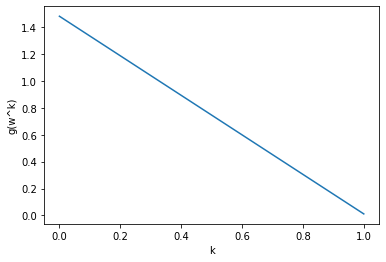

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history);
plt.xlabel("k");
plt.ylabel("g(w^k)");

question 3

In [22]:
# load in dataset
data = np.loadtxt(datapath + 'regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

In [23]:
x

array([[-0.37218035, -0.63010455, -1.15072305,  0.93361692, -0.83197503,
        -1.65698849,  1.12408201, -0.39301979, -0.73269533,  0.45221453]])

In [24]:
y

array([[-1.17480346, -1.85639076, -2.25663055,  9.9945483 , -1.7108687 ,
        -2.68226569,  0.19151539, -1.24701316, -1.68401811, -0.62446651]])

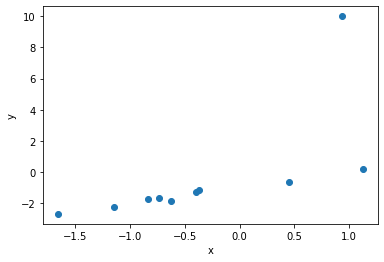

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y);
plt.xlabel("x");
plt.ylabel("y");

In [26]:
# compute linear combination of input point
def model(x,w):
  # finish the implementation
  a = w[0] + np.dot(x.T, w[1:])
  return a.T

In [27]:
# an implementation of the least squares cost function for linear regression
def least_squares(w):
  # finish the implementation
  # compute the least squares cost
  cost = np.sum((model(x,w) - y)**2)
  return cost/float(np.size(y))

In [28]:
# a compact least absolute deviations cost function
def least_absolute_deviations(w):
  # finish the imeplementation
  cost = np.sum(np.abs(model(x,w) - y))
  return cost/float(np.size(y))

In [29]:
np.random.seed(5819)
# run gradient descent to minimize the Least Squares cost for linear regression
g = least_squares; w = np.array([1.0,1.0])[:,np.newaxis]; max_its = 100; alpha_choice = 10**(-1);
weight_history_1,cost_history_1 = gradient_descent(g,alpha_choice,max_its,w)

np.random.seed(5819)
# run gradient descent to minimize the Least Squares cost for linear regression
g = least_absolute_deviations; w = np.array([1.0,1.0])[:,np.newaxis]; max_its = 100; alpha_choice = 10**(-1);
weight_history_2,cost_history_2 = gradient_descent(g,alpha_choice,max_its,w)

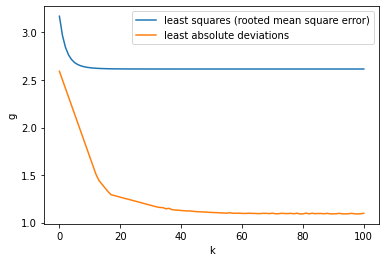

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.sqrt(np.array(cost_history_1)));
#plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.xlabel("k");
plt.ylabel("g");
plt.legend(["least squares (rooted mean square error)", "least absolute deviations"]);

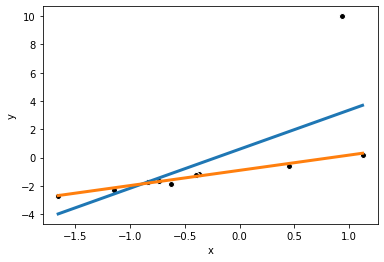

In [31]:
# find best set of weights from gradient descent run on Least Absolute Deviations cost 
ind = np.argmin(cost_history_1)
# finish the next line of code
least_weights = weight_history_1[ind]
ind = np.argmin(cost_history_2)
# finish the next line of code
absolute_weights = weight_history_2[ind]
s = np.linspace(np.min(x),np.max(x))
w = least_weights
# finish the next line of code
t = w[0] + w[1]*s
w = absolute_weights
# finish the next line of code
u = w[0] + w[1]*s

figure = plt.figure()
plt.plot(s,t,linewidth = 3)
plt.plot(s,u,linewidth = 3)
plt.scatter(x,y,linewidth = 1,c='k',edgecolor='w')
plt.xlabel('x')
plt.ylabel('y')
plt.show()